In [1]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, r2_score
import pickle

### Чтение данных

In [2]:
data = pd.read_excel('data/data_prep_model.xlsx')

In [3]:
data.head()

,material_type,electronegativity,ionic_radius,core_size,diameter,surface_charge,surface_area,cell_type,concentration,number_of_atoms,...,shape,synthesis_method,surface_charge_type,size_in_water,size_in_medium,zeta_in_medium,no_of_cells,aspect_ratio,pdi,toxicity
0,CuO,1.90,73.0,12.8,313.8,7.6,74.2,1.0,200.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ZnO,1.65,74.0,22.6,114.7,28.8,47.4,0.0,200.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ZnO,1.65,74.0,22.6,114.7,28.8,47.4,0.0,100.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ZnO,1.65,74.0,22.6,69.4,28.8,47.4,1.0,100.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mn2O3,1.55,58.0,51.5,291.7,-46.1,25.9,1.0,200.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8627 entries, 0 to 8626
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   material_type                   8627 non-null   object 
 1   electronegativity               6821 non-null   float64
 2   ionic_radius                    4350 non-null   float64
 3   core_size                       1627 non-null   float64
 4   diameter                        7798 non-null   float64
 5   surface_charge                  5369 non-null   float64
 6   surface_area                    1627 non-null   float64
 7   cell_type                       1627 non-null   float64
 8   concentration                   8409 non-null   float64
 9   number_of_atoms                 4350 non-null   float64
 10  molecular_weight                8611 non-null   float64
 11  topological_polar_surface_area  3415 non-null   float64
 12  a                               46

### Выделим категориальные признаки

In [5]:
cat_features = [
    'material_type', 'cell_type', 'type', 'coat', 
    'cell_line', 'human/animal', 'animal', 'cell_morphology', 
    'cell_age', 'cell_organ', 'test', 'test_indicator', 
    'biochemical_metrics', 'interference_test', 'colloidal_stability', 'positive_control', 
    'particle_id', 'shape', 'synthesis_method', 'surface_charge_type', 'toxicity', 'cell_line_bin'
    ]

In [6]:
for col in cat_features:
    data[col] = data[col].astype(str)
    data[col] = data[col].fillna('nan').replace('nan', 'null_obj')

In [7]:
data[cat_features].head()

,material_type,cell_type,type,coat,cell_line,human/animal,animal,cell_morphology,cell_age,cell_organ,...,biochemical_metrics,interference_test,colloidal_stability,positive_control,particle_id,shape,synthesis_method,surface_charge_type,toxicity,cell_line_bin
0,CuO,1.0,I,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,...,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj
1,ZnO,0.0,I,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,...,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj
2,ZnO,0.0,I,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,...,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj
3,ZnO,1.0,I,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,...,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj
4,Mn2O3,1.0,I,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,...,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj,null_obj


### Введем случайный признак
Впоследствии признаки с важностью меньше важности случайного признака отбросим

In [8]:
import random

data['random'] = [random.random() for i in range(len(data))]

### Разделим данные на обучающую и тестовую выборки

In [9]:
train_data, test_data = train_test_split(data, test_size = 0.2, shuffle=True, random_state=123)

### Подбор гиперпараметров

In [10]:
model = CatBoostRegressor(
                        cat_features = cat_features, 
                        random_seed=123 
                        )

In [12]:
from sklearn.model_selection import GridSearchCV

parametrs = {
    'iterations': range(149, 151),
    'max_depth': range(9, 11),
    }

grid = GridSearchCV(model, parametrs, cv=5)
grid.fit(data.drop('viability', axis=1), data['viability'].values)

In [ ]:
grid.best_params_

{'iterations': 149, 'max_depth': 10}

In [13]:
from sklearn.model_selection import KFold

In [14]:
n_splits = 3


models = []
X = train_data.drop('viability', axis=1)
y = train_data['viability'].values

X_test_data = test_data.drop('viability', axis=1)
y_test_data = test_data['viability'].values

# параметры валидации, обучение будет идти на 6 X n_splits фолдах

kFold_random_state = 123
# N = len(kFold_random_state)*n_splits

kf = KFold(n_splits=n_splits, shuffle=True, random_state=kFold_random_state)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = CatBoostRegressor(
        iterations = 150,
        learning_rate=1,
        depth=10,
        cat_features = cat_features, 
        random_seed=kFold_random_state
        )
    models.append(model)

    model.fit(
        X_train, y_train, eval_set=(X_test, y_test),
        verbose = 500, use_best_model = True, plot = False
        )
        
assert len(models) == n_splits

# массив для записи финального результата
pred = np.zeros((len(X_test_data),))
scores = []
for model in models:
    pred += model.predict(X_test_data)
    scores.append(model.best_score_['validation']['RMSE'])
pred /= n_splits

0:	learn: 25.5231304	test: 26.7012105	best: 26.7012105 (0)	total: 121ms	remaining: 18s
149:	learn: 3.9426321	test: 21.5138435	best: 21.3415745 (58)	total: 16.7s	remaining: 0us

bestTest = 21.34157445
bestIteration = 58

Shrink model to first 59 iterations.
0:	learn: 24.9210976	test: 25.0297870	best: 25.0297870 (0)	total: 107ms	remaining: 15.9s
149:	learn: 3.8916017	test: 21.2601662	best: 20.9562399 (47)	total: 32s	remaining: 0us

bestTest = 20.95623987
bestIteration = 47

Shrink model to first 48 iterations.
0:	learn: 25.5903960	test: 26.5887563	best: 26.5887563 (0)	total: 225ms	remaining: 33.5s
149:	learn: 4.6061586	test: 22.2323446	best: 21.7832018 (25)	total: 36.5s	remaining: 0us

bestTest = 21.78320178
bestIteration = 25

Shrink model to first 26 iterations.


### Прогноз

In [15]:
# pred = model.predict(X_test)

### Метрики

In [16]:
print(
    'MAE: ', MAE(pred, y_test_data),
    '\nMRSE: ', MSE(pred, y_test_data)**0.5,
    '\nR2: ', r2_score(pred, y_test_data)
    )

MAE:  13.536436173968086 
MRSE:  18.90896313005449 
R2:  0.454062631192898


<AxesSubplot:>

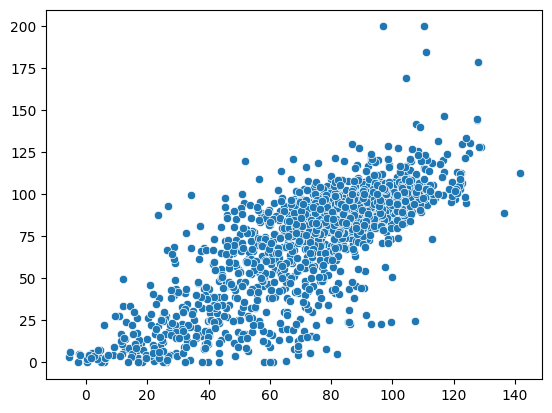

In [17]:
import seaborn as sns
sns.scatterplot(x=pred, y=y_test_data)

### SHAP

In [18]:
import shap
shap.initjs()

In [19]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Pool(X, y, cat_features=cat_features))

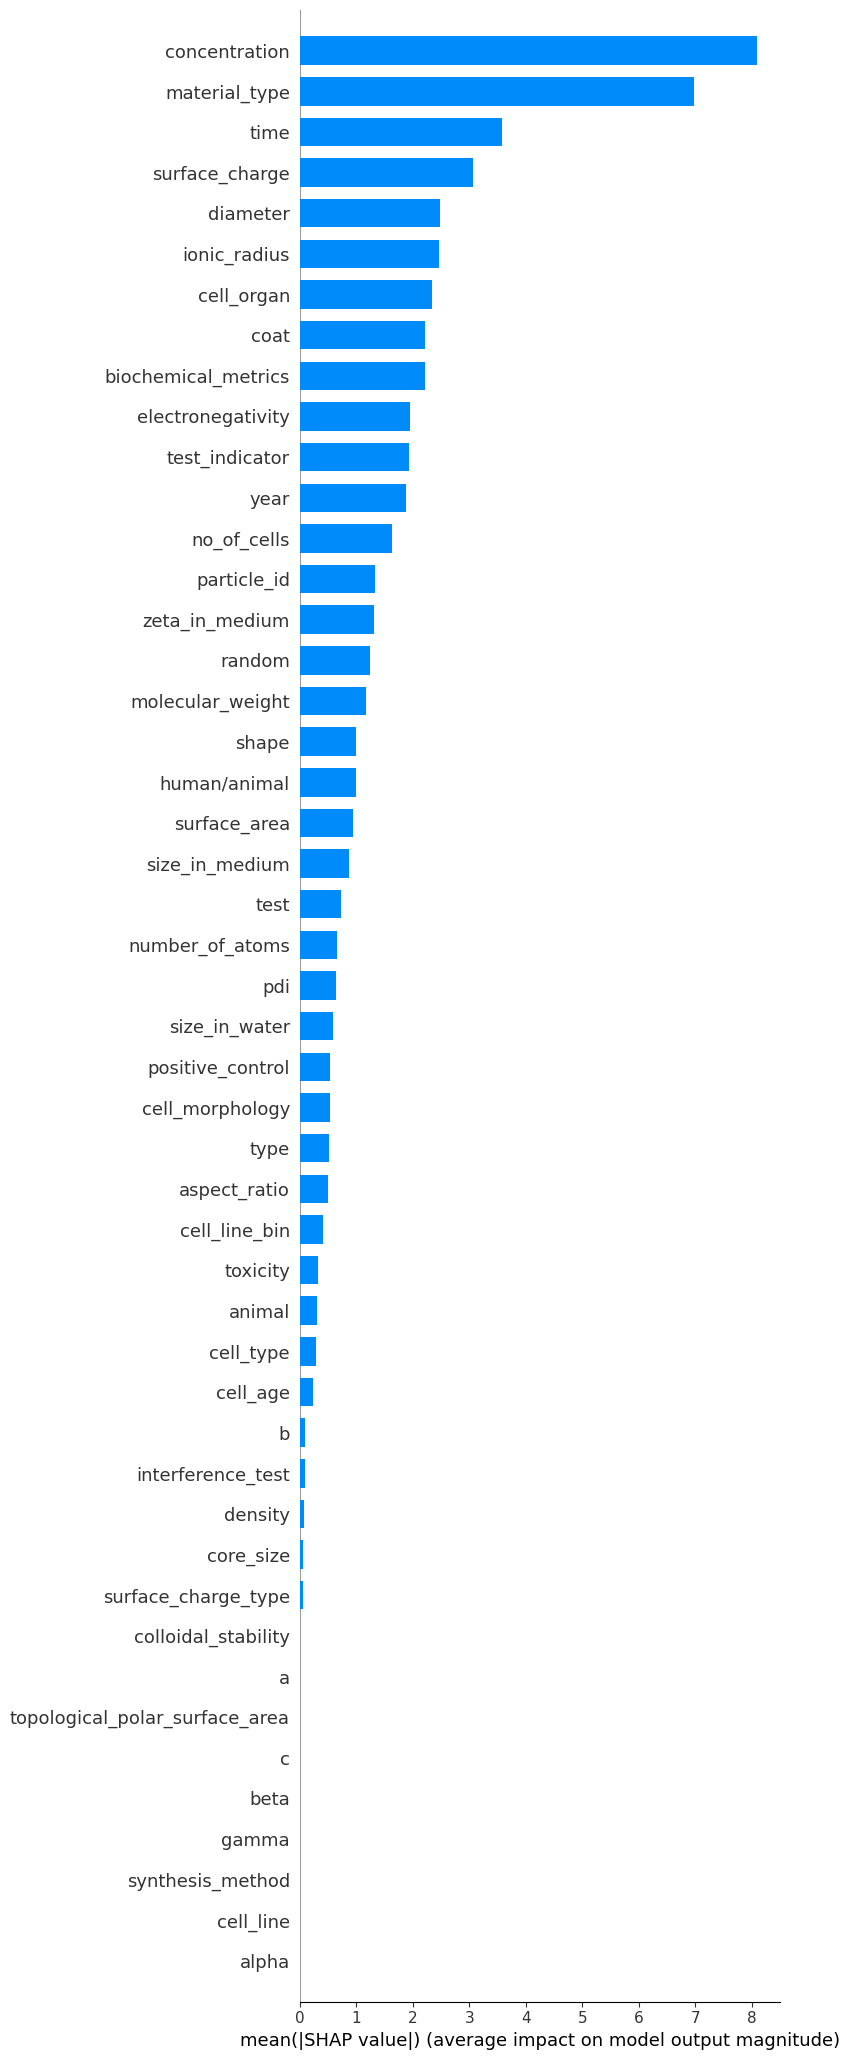

In [20]:
shap.summary_plot(shap_values, X, max_display=50, plot_type="bar")

In [21]:
feature_names = X.columns

rf_resultX = pd.DataFrame(shap_values, columns = feature_names)
vals = np.abs(rf_resultX.values).mean(0)
shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
random_fi = shap_importance[shap_importance.col_name == 'random'].feature_importance_vals.values[0]
filtered_cols = shap_importance[shap_importance.feature_importance_vals > random_fi].col_name.to_list()

In [22]:
drop_features = ['biochemical_metrics', 'cell_organ', 'particle_id', 'year', 'coat', 'test_indicator']

In [23]:
data = data[filtered_cols + ['viability']]
data.drop(drop_features, axis=1, inplace=True)

In [24]:
train_data, test_data = train_test_split(data, test_size = 0.2, shuffle=True, random_state=123)

In [29]:
filtered_cols + drop_features

['concentration',
 'material_type',
 'time',
 'surface_charge',
 'diameter',
 'ionic_radius',
 'cell_organ',
 'coat',
 'biochemical_metrics',
 'electronegativity',
 'test_indicator',
 'year',
 'no_of_cells',
 'particle_id',
 'zeta_in_medium',
 'biochemical_metrics',
 'cell_organ',
 'particle_id',
 'year',
 'coat',
 'test_indicator']

In [32]:
cat_features = list(set(list(set(cat_features) & set(filtered_cols ))) - set(drop_features))

In [33]:
cat_features

['material_type']

In [34]:
n_splits = 3


models = []
X = train_data.drop('viability', axis=1)
y = train_data['viability'].values

X_test_data = test_data.drop('viability', axis=1)
y_test_data = test_data['viability'].values

# параметры валидации, обучение будет идти на 6 X n_splits фолдах

kFold_random_state = 123
# N = len(kFold_random_state)*n_splits

kf = KFold(n_splits=n_splits, shuffle=True, random_state=kFold_random_state)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = CatBoostRegressor(iterations = 150,
                            learning_rate=1,
                            depth=10,
                            cat_features = cat_features, 
                            random_seed=kFold_random_state
                            )
    models.append(model)

    model.fit(
        X_train, y_train, eval_set=(X_test, y_test),
        verbose = 500, use_best_model = True, plot = False
        )
        
assert len(models) == n_splits

# массив для записи финального результата
pred = np.zeros((len(X_test_data),))
scores = []
for model in models:
    pred += model.predict(X_test_data)
    scores.append(model.best_score_['validation']['RMSE'])
pred /= n_splits

0:	learn: 25.3220040	test: 26.5849771	best: 26.5849771 (0)	total: 121ms	remaining: 18.1s
149:	learn: 10.3001017	test: 21.1435535	best: 21.0731658 (92)	total: 19.1s	remaining: 0us

bestTest = 21.07316583
bestIteration = 92

Shrink model to first 93 iterations.
0:	learn: 25.2400210	test: 25.6686171	best: 25.6686171 (0)	total: 189ms	remaining: 28.2s
149:	learn: 10.5085371	test: 21.4829664	best: 20.9144703 (43)	total: 26.9s	remaining: 0us

bestTest = 20.91447031
bestIteration = 43

Shrink model to first 44 iterations.
0:	learn: 24.7143055	test: 25.6102185	best: 25.6102185 (0)	total: 188ms	remaining: 28s
149:	learn: 9.9619892	test: 21.7266269	best: 21.3337099 (61)	total: 27.3s	remaining: 0us

bestTest = 21.33370992
bestIteration = 61

Shrink model to first 62 iterations.


In [35]:
print(
    'MAE: ', MAE(pred, y_test_data),
    '\nMRSE: ', MSE(pred, y_test_data)**0.5,
    '\nR2: ', r2_score(pred, y_test_data)
    )

MAE:  13.051738789118607 
MRSE:  18.705034999233 
R2:  0.4705293470669284


In [36]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Pool(X, y, cat_features=cat_features))

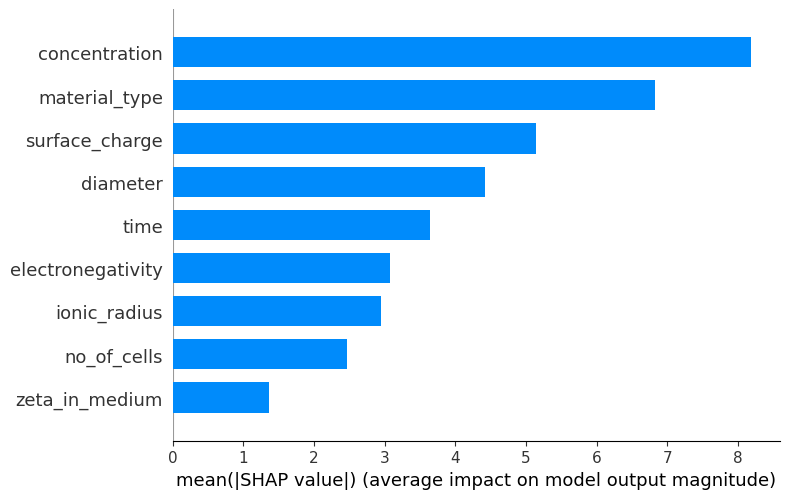

In [37]:
shap.summary_plot(shap_values, X, max_display=50, plot_type="bar")

### Обучаемся на всем датасете

In [38]:
model_final = CatBoostRegressor(
                        iterations = 150,
                        learning_rate=1,
                        depth=10,
                        cat_features = cat_features, 
                        random_seed=123 
                        )


In [39]:
model_final.fit(
    data.drop('viability', axis=1), 
    data['viability'].values,
    verbose = 500, 
    use_best_model = True, 
    plot = False
    )

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 24.8281877	total: 143ms	remaining: 21.3s
149:	learn: 12.3203624	total: 16.8s	remaining: 0us


In [40]:
model_final.save_model('test_model')